### Artificial Neural Network


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\Admin\MSc Applied Statistics SPU\Deep Learning\Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
X=df.iloc[:,3:12]
y=df['Exited']

In [8]:
## Feature Engineering
gph=pd.get_dummies(X['Geography'],dtype=int,drop_first=True)
gender=pd.get_dummies(X['Gender'],dtype=int,drop_first=True)

In [9]:
## Concatenate these variable with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,42,2,0.00,1,1,1
1,608,41,1,83807.86,1,0,1
2,502,42,8,159660.80,3,1,0
3,699,39,1,0.00,2,0,0
4,850,43,2,125510.82,1,1,1


In [10]:
X=pd.concat([X,gph,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,0,0,0
3,699,39,1,0.00,2,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

In [14]:
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.fit_transform(X_test)

In [15]:
X_train.shape,X_test.shape

((8000, 10), (2000, 10))

In [16]:
## Prat 2 
## Create the ANN

In [17]:
from tensorflow.keras.models import Sequential # Sequential (forward and backword propogation)
from tensorflow.keras.layers import Dense #create input , hidden and output layer
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU # Activation function
from tensorflow.keras.layers import Dropout #reduced overfitting

In [18]:
## Lets initialize the ANN
classifier=Sequential()

In [38]:
## Adding input layer
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dropout(0.2))

In [39]:
## Adding First Hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [40]:
## Aadding Second Hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [41]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [42]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])#by default learning rate is 0.01

In [43]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [44]:
#classifier.compile(optimizer='opt',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [46]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.4926 - accuracy: 0.8147 - val_loss: 0.3820 - val_accuracy: 0.8546
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.8337 - val_loss: 0.3789 - val_accuracy: 0.8482
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.8533 - val_loss: 0.3730 - val_accuracy: 0.8557
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8524 - val_loss: 0.3716 - val_accuracy: 0.8512
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3641 - accuracy: 0.8520 - val_loss: 0.3710 - val_accuracy: 0.8448
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3559 - accuracy: 0.8574 - val_loss: 0.3682 - val_accuracy: 0.8508
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8548 - val_loss: 0.3652 - val_accuracy:

In [47]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

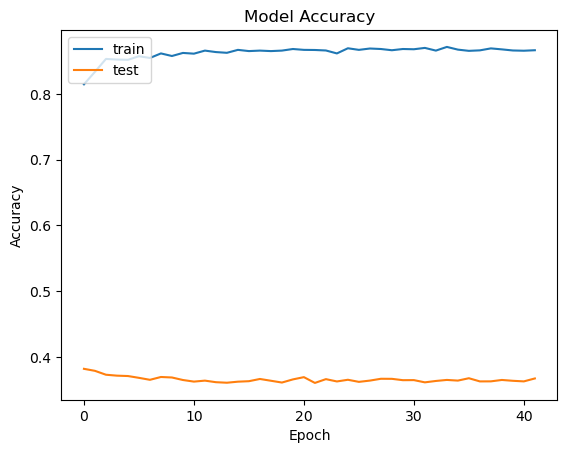

In [48]:
## Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='upper left')
plt.show()



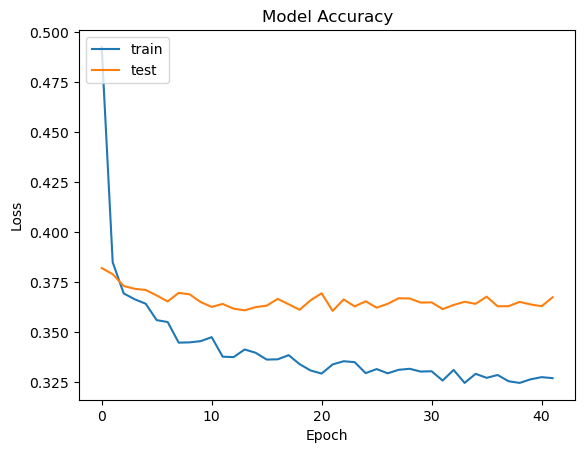

In [50]:
## Summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend(['train','test'],loc='upper left')
plt.show()



In [51]:
# part3 Making the prediction and evaluate model

# prediction the test results

y_prd=classifier.predict(X_test)
y_prd=(y_prd>=0.5)

63/63 [==============================] - 0s 2ms/step


In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm=confusion_matrix(y_test,y_prd)
cm

array([[1558,   37],
       [ 248,  157]], dtype=int64)

In [54]:
# Calculate accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_prd)
score

0.8575

In [55]:
## get the weights
classifier.get_weights()

[array([[ 0.58861   , -0.12273702,  0.22359408,  0.0593917 , -0.09137379,
         -0.09829395,  0.14159085, -0.07525861, -0.03308761,  0.09617636],
        [-0.55964065,  1.0115826 , -0.20278326, -0.0085417 ,  0.82096064,
         -0.28487927,  0.46538818, -0.2209907 , -0.26137337,  0.5120076 ],
        [-0.09888114,  0.02527031,  0.06397086,  0.17577286, -0.02436753,
          0.49800828, -0.15658388, -0.2750058 , -0.47535214, -0.25844315],
        [ 0.17788485, -0.26935974, -0.24373232, -0.8348219 , -0.0248258 ,
         -0.54203236,  0.60960215, -0.6846921 ,  0.47145998,  0.26169613],
        [-0.3517262 , -0.84548706, -0.16055453,  1.0572897 ,  0.02867373,
          0.30267936,  0.6190972 , -0.76627666, -0.20676002, -0.0352774 ],
        [ 0.31420615, -0.06124416, -0.19125612,  0.27642184, -0.03107934,
         -0.09637983, -0.10804942,  0.04578838,  0.09888235,  0.14844301],
        [-0.49990365, -0.14530109,  0.10492501,  0.12059024,  0.7061938 ,
          0.59700805, -0.2624199